# Imports

In [297]:
import time
import numpy as np
import matplotlib.pyplot as plt
import os

In [299]:
!cd data && tar xzf mnist_data.tar.gz && cd ..

In [301]:
def load_data(dir_name):
    """

    X : array_like
        A (N x p=784) matrix of samples 
    Y : array_like
        A (N x 1) matrix of labels for each sample
    """
    data = list()
    
    with open(dir_name,"r") as f: 
        for line in f: 
            split_line = np.array(line.split(',')) 
            split_line = split_line.astype(np.float32) 
            data.append(split_line) 
            
    data = np.asarray(data) 
    
    # as the first number in each sample is the label (0-9), extract that from the rest and return both (X,Y)
    return data[:,1:],data[:,0]

In [303]:
X_train,Y_train = load_data("data/mnist_train.csv")
X_test,Y_test = load_data("data/mnist_test.csv")

In [305]:
print(f"The shape of the training set is: {X_train.shape[0]} x {X_train.shape[1]}")
print(f"The shape of the test set is: {X_test.shape[0]} x {X_test.shape[1]}")

The shape of the training set is: 60000 x 784
The shape of the test set is: 10000 x 784


In [307]:
index = 0
Y_train[index], X_train[index]

(5.0,
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 

In [309]:
#  data between 0 - 1.0
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

# encode train (y_train) and test (y_test) set labels
y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
y_train[np.arange(Y_train.size),Y_train.astype(int)] = 1.0

y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
y_test[np.arange(Y_test.size),Y_test.astype(int)] = 1.0

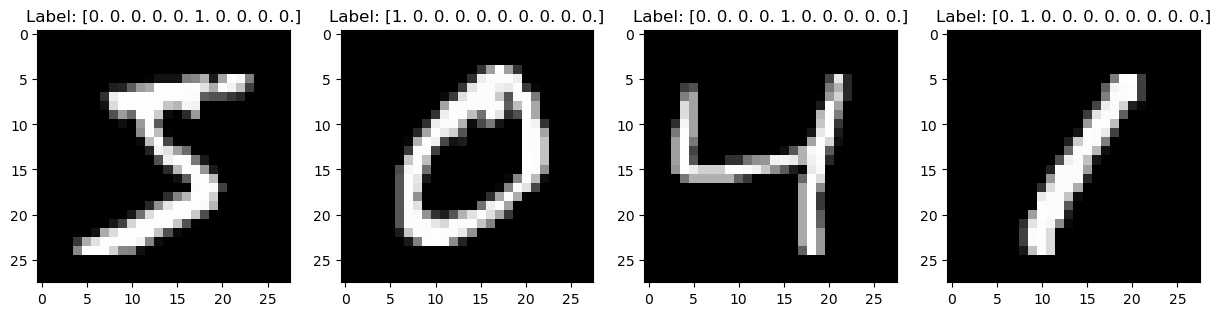

In [311]:
num_images = 4
fig,axes = plt.subplots(1,num_images,figsize=(15,10))
for image,label,ax in zip(X_train[:num_images],y_train[:num_images],axes):
    ax.imshow(image.reshape(28,28),cmap='gray',vmin=0,vmax=1.0)
    ax.set_title(f"Label: {label}")

In [313]:
def sigmoid(x):

    return 1./(1.+np.exp(-x))

In [315]:
def softmax(x):
    
    exponent = np.exp(x) 
    return exponent/exponent.sum(axis=1,keepdims=True)

In [317]:
def init_layers(batch_size,layer_sizes):
       
        hidden_layers = [np.empty((batch_size,layer_size)) for layer_size in layer_sizes]
        return hidden_layers

In [319]:
def init_weights(layer_sizes):
       
        weights = list()
        for i in range(layer_sizes.shape[0]-1):
            weights.append(np.random.uniform(-1,1,size=[layer_sizes[i],layer_sizes[i+1]]))
        weights = asarray(self.weights)
        return weights

In [321]:
def feed_forward(batch,hidden_layers,weights):
    
    h_l = batch
    hidden_layers[0] = h_l
    for i,weight in enumerate(weights):
        h_l = sigmoid(h_l.dot(weight))
        hidden_layers[i+1]=h_l
    output = softmax(hidden_layers[-1])
    return output, hidden_layers

## Backpropagation

In [324]:
def sigmoid_prime(sigmoid_out):
   
    return h*(1-h)

In [326]:
def back_prop(output,batch_y,hidden_layers,weights,batch_size,lr):
        delta_t = (output - batch_y)*sigmoid_prime(hidden_layers[-1])
        for i in range(1,len(weights)+1):
            weights[-i]-=lr*(hidden_layers[-i-1].T.dot(delta_t))/batch_size
            delta_t = sigmoid_prime(hidden_layers[-i-1])*(delta_t.dot(weights[-i].T))
        return weights

## Training

In [330]:
def train(X,Y,layer_sizes,batch_size=8,epochs=25,lr=1.0):

    n_samples = X.shape[0]
    
    hidden_layers = init_layers(batch_size,layer_sizes)
    weights = init_weights(layer_sizes)
    for epoch in range(epochs):
        start = time.time()
        
        shuffle = np.random.permutation(n_samples)       
        X_batches = np.array_split(X[shuffle],n_samples/batch_size)
        Y_batches = np.array_split(Y[shuffle],n_samples/batch_size)
        
        train_loss = 0
        train_acc = 0
        
        for batch_x,batch_y in zip(X_batches,Y_batches):
            output,hidden_layers = feed_forward(batch_x,hidden_layers,weights)  
            train_loss += loss(output,batch_y)
            train_acc += accuracy(to_categorical(output),batch_y)
            weights = back_prop(output,batch_y,hidden_layers,weights,batch_size,lr)

        train_loss = (train_loss/len(X_batches))
        train_acc = (train_acc/len(X_batches))

        train_time = round(time.time()-start,3)

        print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | train_time = {train_time} | tot_time = {tot_time}")
    
    return weights

In [344]:
class MLP():
    
    def __init__(self,X,Y,X_val,Y_val,L=1,N_l=128):
        self.X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.Y = np.squeeze(np.eye(10)[Y.astype(int).reshape(-1)])
        self.X_val = np.concatenate((X_val,np.ones((X_val.shape[0],1))),axis=1)
        self.Y_val = np.squeeze(np.eye(10)[Y_val.astype(int).reshape(-1)])
        self.L = L
        self.N_l = N_l
        self.n_samples = self.X.shape[0]
        self.layer_sizes =np.array([self.X.shape[1]]+[N_l]*L+[self.Y.shape[1]]) 
        self.__init_weights()
        self.train_loss = list()
        self.train_acc = list()
        self.val_loss = list()
        self.val_acc = list()
        self.train_time = list()
        self.tot_time = list()
        self.metrics = [self.train_loss,self.train_acc,self.val_loss,self.val_acc,self.train_time,self.tot_time]
        
    def __sigmoid(self,x):
        
        return 1./(1.+np.exp(-x))
    
    def __softmax(self,x):
        
        exponent = np.exp(x)
        return exponent/exponent.sum(axis=1,keepdims=True)
    
    def __loss(self,y_pred,y):
       
        return ((-np.log(y_pred))*y).sum(axis=1).mean()
    
    def __accuracy(self,y_pred,y):  
      
        return np.all(y_pred==y,axis=1).mean()
    
    def __sigmoid_prime(self,h):
       
        return h*(1-h)
    
    def __to_categorical(self,x):  
       
        categorical = np.zeros((x.shape[0],self.Y.shape[1]))
        categorical[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
        return categorical
    
    def __init_weights(self):

        self.weights = list()
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))

    
    def __init_layers(self,batch_size):
       
        self.__h = [np.empty((batch_size,layer)) for layer in self.layer_sizes]
    
    def __feed_forward(self,batch):
       
        h_l = batch
        self.__h[0] = h_l
        for i,weights in enumerate(self.weights):
            h_l = self.__sigmoid(h_l.dot(weights))
            self.__h[i+1]=h_l
        self.__out = self.__softmax(self.__h[-1])
    
    def __back_prop(self,batch_y):
       
        delta_t = (self.__out - batch_y)*self.__sigmoid_prime(self.__h[-1])
        for i in range(1,len(self.weights)+1):
            self.weights[-i]-=self.lr*(self.__h[-i-1].T.dot(delta_t))/self.batch_size
            delta_t = self.__sigmoid_prime(self.__h[-i-1])*(delta_t.dot(self.weights[-i].T))
            
    def predict(self,X):
        
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.__init_layers(X.shape[0])
        self.__feed_forward(X)
        return self.__to_categorical(self.__out)
    
    def evaluate(self,X,Y):
      
        prediction = self.predict(X)
        return self.__accuracy(prediction,Y)
        
    def train(self,batch_size=8,epochs=25,lr=1.0):
        
        self.lr = lr
        self.batch_size=batch_size
        for epoch in range(epochs):
            start = time.time()
            
            self.__init_layers(self.batch_size)
            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            train_acc = 0
            X_batches = np.array_split(self.X[shuffle],self.n_samples/self.batch_size)
            Y_batches = np.array_split(self.Y[shuffle],self.n_samples/self.batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.__feed_forward(batch_x)  
                train_loss += self.__loss(self.__out,batch_y)
                train_acc += self.__accuracy(self.__to_categorical(self.__out),batch_y)
                self.__back_prop(batch_y)
                
            train_loss = (train_loss/len(X_batches))
            train_acc = (train_acc/len(X_batches))
            self.train_loss.append(train_loss)
            self.train_acc.append(train_acc)
            
            train_time = round(time.time()-start,3)
            self.train_time.append(train_time)
            
            self.__init_layers(self.X_val.shape[0])
            self.__feed_forward(self.X_val)
            val_loss = self.__loss(self.__out,self.Y_val)
            val_acc = self.__accuracy(self.__to_categorical(self.__out),self.Y_val)
            self.val_loss.append(val_loss)
            self.val_acc.append(val_acc)
            
            tot_time = round(time.time()-start,3)
            self.tot_time.append(tot_time)
            
            #print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | val_loss = {val_loss.round(3)} | val_acc = {val_acc.round(3)} | train_time = {train_time} | tot_time = {tot_time}")
    

In [334]:
model = MLP(X_train,Y_train,X_test,Y_test,L=1,N_l=8)
model.train(batch_size=8,epochs=25,lr=1.0)

Epoch 1: loss = 1.662 | acc = 0.803 | val_loss = 1.588 | val_acc = 0.875 | train_time = 1.257 | tot_time = 1.274
Epoch 2: loss = 1.581 | acc = 0.878 | val_loss = 1.576 | val_acc = 0.875 | train_time = 1.27 | tot_time = 1.285
Epoch 3: loss = 1.567 | acc = 0.886 | val_loss = 1.56 | val_acc = 0.888 | train_time = 1.092 | tot_time = 1.105
Epoch 4: loss = 1.562 | acc = 0.889 | val_loss = 1.56 | val_acc = 0.899 | train_time = 0.959 | tot_time = 0.971
Epoch 5: loss = 1.559 | acc = 0.889 | val_loss = 1.559 | val_acc = 0.889 | train_time = 0.948 | tot_time = 0.961
Epoch 6: loss = 1.556 | acc = 0.892 | val_loss = 1.558 | val_acc = 0.892 | train_time = 0.808 | tot_time = 0.82
Epoch 7: loss = 1.555 | acc = 0.892 | val_loss = 1.56 | val_acc = 0.89 | train_time = 0.921 | tot_time = 0.933
Epoch 8: loss = 1.553 | acc = 0.894 | val_loss = 1.556 | val_acc = 0.89 | train_time = 0.827 | tot_time = 0.838
Epoch 9: loss = 1.552 | acc = 0.894 | val_loss = 1.551 | val_acc = 0.895 | train_time = 0.826 | tot_tim

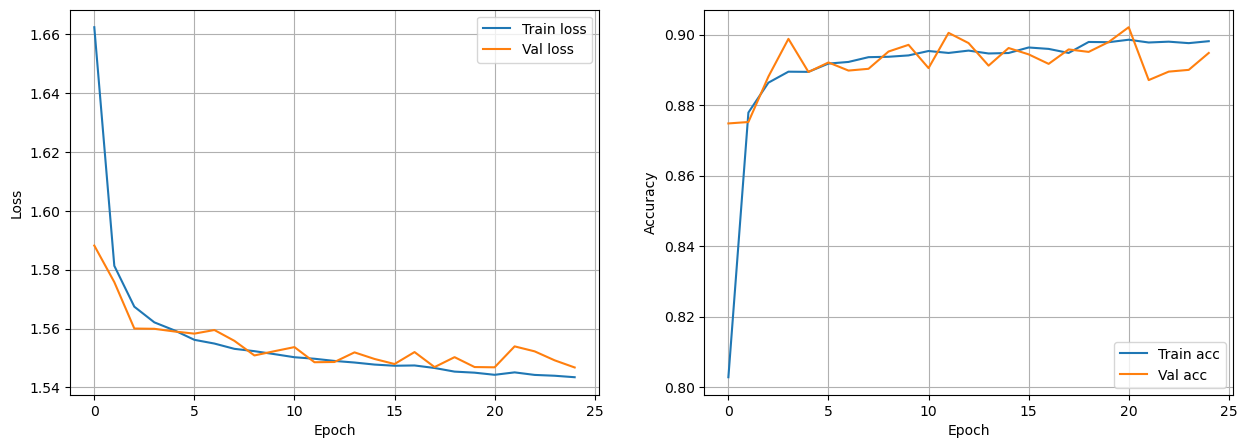

In [336]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(model.train_loss,label="Train loss")
ax[0].plot(model.val_loss,label="Val loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(model.train_acc,label="Train acc")
ax[1].plot(model.val_acc,label="Val acc")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()

Training with N_l = 4


N_l = 4: 100%|██████████| 4/4 [01:22<00:00, 20.73s/epoch]


Training with N_l = 8


N_l = 8: 100%|██████████| 4/4 [01:24<00:00, 21.20s/epoch]


Training with N_l = 16


N_l = 16: 100%|██████████| 4/4 [02:14<00:00, 33.52s/epoch]


Training with N_l = 32


N_l = 32: 100%|██████████| 4/4 [02:43<00:00, 40.78s/epoch]


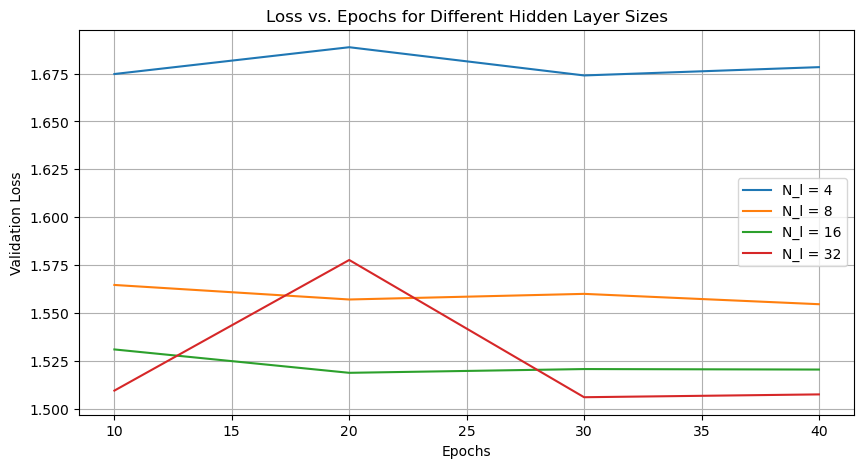

Training for different learning rates


Learning rates: 100%|██████████| 4/4 [01:25<00:00, 21.40s/lr]


In [348]:

from tqdm import tqdm

# Define the parameters
N_l_values = [4, 8, 16, 32]
epoch_values = [10, 20, 30, 40]
learning_rates = [0.01, 0.5, 0.8, 1.0]

# Store the results for plotting
losses_by_nl = {}
acc_by_lr = {}

# Loop over different numbers of neurons in the hidden layer
for N_l in N_l_values:
    losses = []
    # Using tqdm to show progress for different epoch values
    print(f"Training with N_l = {N_l}")
    for epochs in tqdm(epoch_values, desc=f'N_l = {N_l}', unit='epoch'):
        model = MLP(X_train, Y_train, X_test, Y_test, L=1, N_l=N_l)
        model.train(batch_size=8, epochs=epochs, lr=1.0)
        losses.append(model.val_loss[-1])  # Store the final validation loss
    losses_by_nl[N_l] = losses

# Plot loss vs. epochs for different hidden layer sizes
plt.figure(figsize=(10, 5))
for N_l, losses in losses_by_nl.items():
    plt.plot(epoch_values, losses, label=f"N_l = {N_l}")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Loss vs. Epochs for Different Hidden Layer Sizes')
plt.legend()
plt.grid(True)
plt.show()

# Loop over different learning rates to analyze accuracy changes
print("Training for different learning rates")
for lr in tqdm(learning_rates, desc='Learning rates', unit='lr'):
    model = MLP(X_train, Y_train, X_test, Y_test, L=1, N_l=8)
    model.train(batch_size=8, epochs=25, lr=lr)
    acc_by_lr[lr] = model.val_acc[-1]  # Store the final validation accuracy

# Plot accuracy vs. learning rate
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, list(acc_by_lr.values()), marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.grid(True)
plt.show()